In [1]:
from mnemonic import Mnemonic
from bip32utils import BIP32Key
import os

os.chdir("..")
import wallet
import walletstreaming


In [2]:
WALLET_API = "https://regtest.apibtc.org/apibtc/"

In [3]:
mnemon = Mnemonic('english')
words = mnemon.generate(128)

In [4]:
print(words)

extend room era hero twenty screen april spider reflect slush crucial gain


In [5]:
private_key = BIP32Key.fromEntropy(mnemon.to_seed(words)).PrivateKey().hex()
private_key

'e2b799df2339d75ddc542519d651862113ef0b13761ad2fe9e2eae0691b643d3'

In [6]:
w=wallet.Wallet(WALLET_API, private_key)

In [7]:
w.getbalance()

{'availableAmount': 0,
 'totalAmount': 0,
 'totalTopups': 0,
 'notConfirmedTopups': 0,
 'settledEarnings': 0,
 'totalEarnings': 0,
 'totalPayments': 0,
 'inFlightPayments': 0,
 'totalPayouts': 0,
 'inProgressPayouts': 0,
 'totalPaymentFees': 0,
 'inFlightPaymentFees': 0,
 'totalPayoutOnChainFees': 0,
 'inProgressPayoutOnChainFees': 0,
 'totalPayoutFees': 0,
 'inProgressPayoutFees': 0}

In [8]:
w.topupandmine6blocks(w.newaddress(),100000)

In [9]:
w.getbalance()

{'availableAmount': 100000,
 'totalAmount': 100000,
 'totalTopups': 100000,
 'notConfirmedTopups': 0,
 'settledEarnings': 0,
 'totalEarnings': 0,
 'totalPayments': 0,
 'inFlightPayments': 0,
 'totalPayouts': 0,
 'inProgressPayouts': 0,
 'totalPaymentFees': 0,
 'inFlightPaymentFees': 0,
 'totalPayoutOnChainFees': 0,
 'inProgressPayoutOnChainFees': 0,
 'totalPayoutFees': 0,
 'inProgressPayoutFees': 0}

In [10]:
invoice = w.addinvoice(1000,"test",30)
invoice

{'paymentRequest': 'lnbcrt10u1pn7mlwxpp5adme05acdzgrvkkhft3tvdw7sgqg3pxht6vx2ltfvsyrhh3pcjdqdq8w3jhxaqcqzzsxqp7sp5pp0tf9yzgpq2g2afgj54lrv88gwrhcprzre5kgl57zy7hue0rl6s9p4gqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqpqysgqkq5mhwlaeur3s9a035zpyd4je7aj9w24x6er0369w2cp8aayfsf3ap8vg9agcx4t85qhuwafq93lzzyejfj8muruhq768yj3nntfq6gqe836m2',
 'state': 0,
 'isHodl': False,
 'settleTime': None,
 'paymentHash': 'eb7797d3b86890365ad74ae2b635de82008884d75e98657d6964083bde21c49a',
 'satoshis': 1000,
 'paymentAddr': '085eb494824040a42ba944a95f8d873a1c3be02310f34b23f4f089ebf32f1ff5',
 'memo': 'test',
 'creationTime': '2025-04-03T03:17:26Z',
 'expiryTime': '2025-04-03T03:17:56Z'}

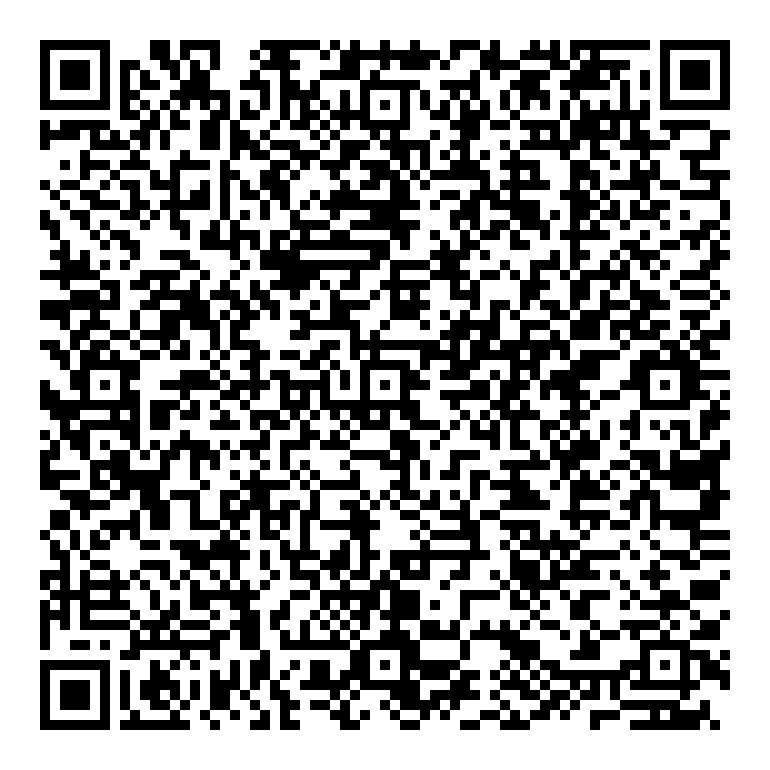

In [11]:
import qrcode
img = qrcode.make(invoice["paymentRequest"])
img

In [ ]:
wstr = walletstreaming.WalletStreaming(w)
invoicestateupdates = wstr.invoicestateupdates()

Connection started
Negotiate url:https://regtest.apibtc.org/apibtc//invoicestateupdates/negotiate?authtoken=CkAKEgoQhkMrnAN2Ss63aQKncfUZCRIiCiAlFHR11TuKF%2B8YwKFEieBXtD1kh17ZpiNdP/T6aw09ARoGCMv7t78GEkIKQAN2TfaGDD4/nB8Rhi0gwwIOvxQHNRpn62yeBJm6z6bCbvfaiyHVEgJxFzxi//o0a8v2WNocvUvn0n%2BYGnOpHjA%3D
Response status code200
start url:wss://regtest.apibtc.org/apibtc//invoicestateupdates?authtoken=CkAKEgoQhkMrnAN2Ss63aQKncfUZCRIiCiAlFHR11TuKF%2B8YwKFEieBXtD1kh17ZpiNdP%2FT6aw09ARoGCMv7t78GEkIKQAN2TfaGDD4%2FnB8Rhi0gwwIOvxQHNRpn62yeBJm6z6bCbvfaiyHVEgJxFzxi%2F%2Fo0a8v2WNocvUvn0n%2BYGnOpHjA%3D&id=I3cLeaVlOwPubY6BAio_Jg


--- request header ---
GET /apibtc//invoicestateupdates?authtoken=CkAKEgoQhkMrnAN2Ss63aQKncfUZCRIiCiAlFHR11TuKF%2B8YwKFEieBXtD1kh17ZpiNdP%2FT6aw09ARoGCMv7t78GEkIKQAN2TfaGDD4%2FnB8Rhi0gwwIOvxQHNRpn62yeBJm6z6bCbvfaiyHVEgJxFzxi%2F%2Fo0a8v2WNocvUvn0n%2BYGnOpHjA%3D&id=I3cLeaVlOwPubY6BAio_Jg HTTP/1.1
Upgrade: websocket
Host: regtest.apibtc.org
Origin: http://regtest.apibtc.org
Sec-WebSocket-Key: mBzQnH8hAXdm6CsfSu/HKQ==
Sec-WebSocket-Version: 13
Connection: Upgrade


-----------------------
--- response header ---
HTTP/1.1 101 Switching Protocols
Server: nginx
Date: Thu, 03 Apr 2025 03:17:32 GMT
Connection: upgrade
Upgrade: websocket
Sec-WebSocket-Accept: ZrORoM3nv4Ny2GpiWtAZcJoiwxQ=
-----------------------
-- web socket open --
Sending message <signalrcore.messages.handshake.request.HandshakeRequestMessage object at 0x000002C0A34D5D30>
{"protocol": "json", "version": 1}
++Sent raw: b'\x81\xa3TP\x00\xb6/rp\xc4;$o\xd5;<"\x8ctrj\xc5;>"\x9atrv\xd3&#i\xd9:r:\x96e-\x1e'
++Sent decoded: fin=1 opc

connection opened and handshake received ready to send messages


++Rcv raw: b'\x81\x0b{"type":6}\x1e'
++Rcv decoded: fin=1 opcode=1 data=b'{"type":6}\x1e'
Message received{"type":6}
Raw message incomming: 
{"type":6}
Sending message <signalrcore.messages.ping_message.PingMessage object at 0x000002C0A3538A50>
{"type": 6}
++Sent raw: b'\x81\x8cr\x0b\xc8\xff\t)\xbc\x86\x02n\xea\xc5R=\xb5\xe1'
++Sent decoded: fin=1 opcode=1 data=b'{"type": 6}\x1e'
Sending message <signalrcore.messages.ping_message.PingMessage object at 0x000002C0A3538A50>
{"type": 6}
++Sent raw: b"\x81\x8c\xecl\x16'\x97Nb^\x9c\t4\x1d\xccZk9"
++Sent decoded: fin=1 opcode=1 data=b'{"type": 6}\x1e'
++Rcv raw: b'\x81\x0b{"type":6}\x1e'
++Rcv decoded: fin=1 opcode=1 data=b'{"type":6}\x1e'
Message received{"type":6}
Raw message incomming: 
{"type":6}
Sending message <signalrcore.messages.ping_message.PingMessage object at 0x000002C0A33BBA80>
{"type": 6}
++Sent raw: b'\x81\x8c\x977;,\xec\x15OU\xe7R\x19\x16\xb7\x01F2'
++Sent decoded: fin=1 opcode=1 data=b'{"type": 6}\x1e'
++Rcv raw: b'\x

In [13]:
invoicestateupdates.stream(lambda x: print("AAAAAAAA",x), lambda e,x: print(x))

Sending message <signalrcore.messages.stream_invocation_message.StreamInvocationMessage object at 0x000002C0A34D5E80>
{"type": 4, "headers": {}, "target": "StreamAsync", "arguments": ["CkAKEgoQhkMrnAN2Ss63aQKncfUZCRIiCiAlFHR11TuKF+8YwKFEieBXtD1kh17ZpiNdP/T6aw09ARoGCNT7t78GEkIKQEuxWuszPMWl7xMCX2+v0eZZMaTMaJ4O0YSbFD47kTq3jNIK2K5uc1C6mW/QjMZq9DvKVF/VsDRRxK2LoeSqpI8="], "invocationId": "6d42db93-a474-40c9-be7d-49ad6625628a", "streamIds": []}
++Sent raw: b'\x81\xfe\x01D\x8b\xb9<A\xf0\x9bH8\xfb\xdc\x1e{\xab\x8d\x10a\xa9\xd1Y \xef\xdcN2\xa9\x83\x1c:\xf6\x95\x1cc\xff\xd8N&\xee\xcd\x1e{\xab\x9bo5\xf9\xdc],\xca\xcaE/\xe8\x9b\x10a\xa9\xd8N&\xfe\xd4Y/\xff\xca\x1e{\xab\xe2\x1e\x02\xe0\xf8w\x04\xec\xd6m)\xe0\xf4N/\xca\xf7\x0e\x12\xf8\x8f\x0f \xda\xf2R"\xed\xecf\x02\xd9\xf0U\x02\xe2\xf8P\x07\xc3\xeb\rp\xdf\xccw\x07\xa0\x81e6\xc0\xffy(\xee\xfbd5\xcf\x88W)\xba\x8ef1\xe2\xf7X\x11\xa4\xed\n \xfc\x89\x05\x00\xd9\xd6{\x02\xc5\xed\x0b5\xbc\x81{\x04\xe0\xf0w\x10\xce\xccD\x16\xfe\xcaF\x11\xc6\xeePv\xf3\xf4\x

In [14]:
w.cancelinvoice(invoice["paymentHash"])

Exception: UnknownInvoice: Unknown invoice

In [25]:
w.getinvoice(invoice["paymentHash"])

{'paymentRequest': 'lnbcrt10u1pn7k837pp5kt653rdgkurg8jsxnkfauyel9tyqmkgjae0hy4js3qdrek3ekpfqdq8w3jhxaqcqzzsxqp7sp5722hkcx869t5aq80jdu470uydxpzve60e6y9ca70saj5ktv0dnws9p4gqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqpqysgq34y0xkx4gtuxlpz3tgp0js2jzunhs8wds9uackdng4wal6rqerw8kunx4yn8vggpu3qsymzj97dwvdzryg9y85qefqdf2gl76s0ldygqndhjyt',
 'state': 2,
 'isHodl': False,
 'settleTime': '1970-01-01T00:00:00Z',
 'paymentHash': 'b2f5488da8b70683ca069d93de133f2ac80dd912ee5f725650881a3cda39b052',
 'satoshis': 1000,
 'paymentAddr': 'f2957b60c7d1574e80ef93795f3f84698226674fce885c77cf87654b2d8f6cdd',
 'memo': 'test',
 'creationTime': '2025-03-31T22:59:10Z',
 'expiryTime': '2025-03-31T22:59:40Z'}

In [17]:
invoicestateupdates.stop()

Connection stop
++Sent raw: b'\x88\x82\xed\xdb\xd4V\xee3'
++Sent decoded: fin=1 opcode=8 data=b'\x03\xe8'
